<a href="https://colab.research.google.com/github/erwannlenoach/erwannlenoach/blob/main/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [12]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

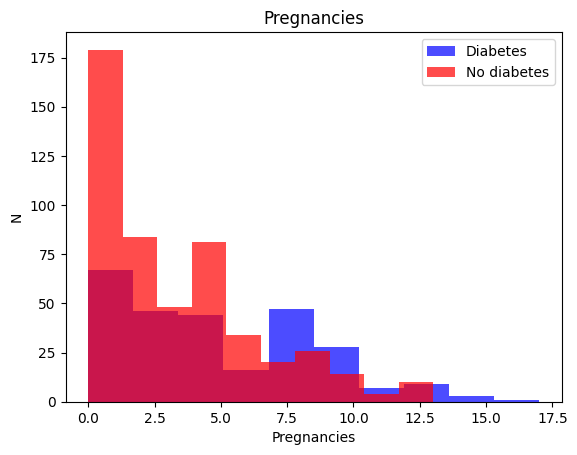

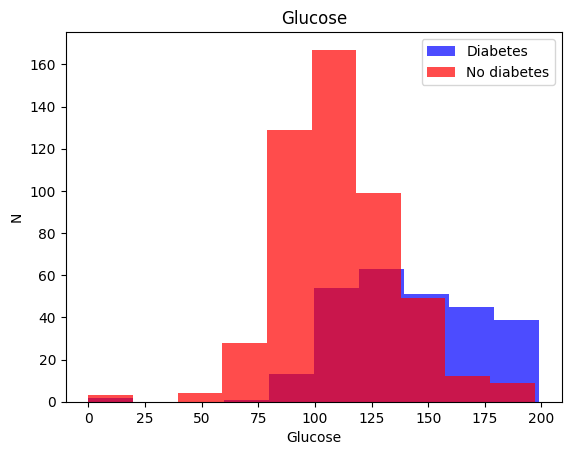

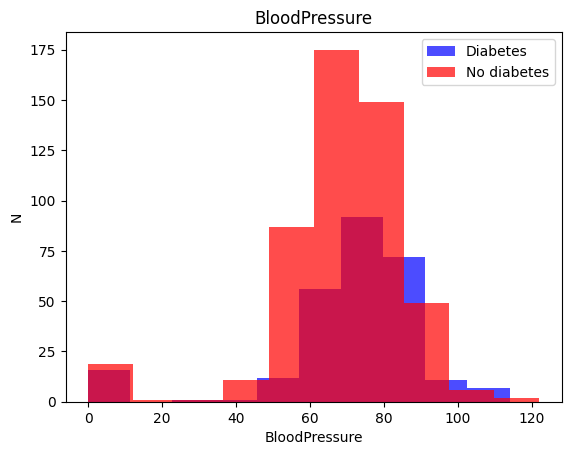

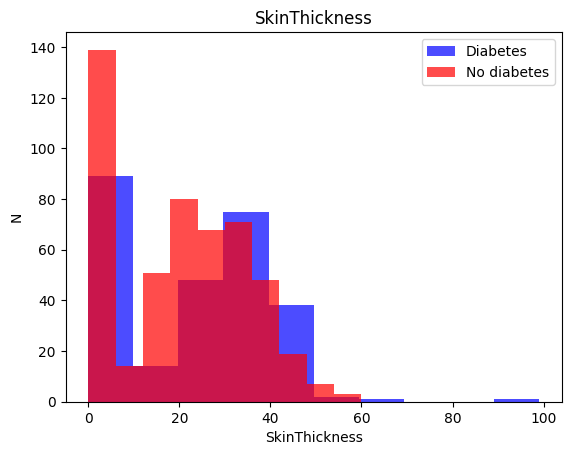

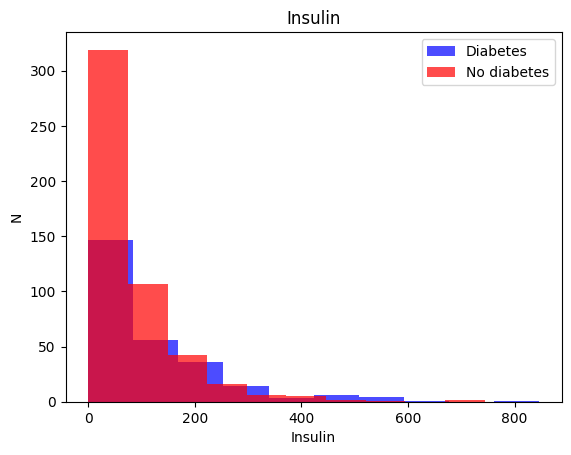

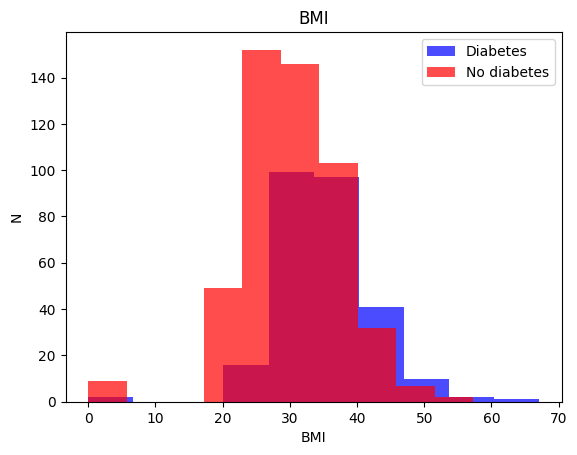

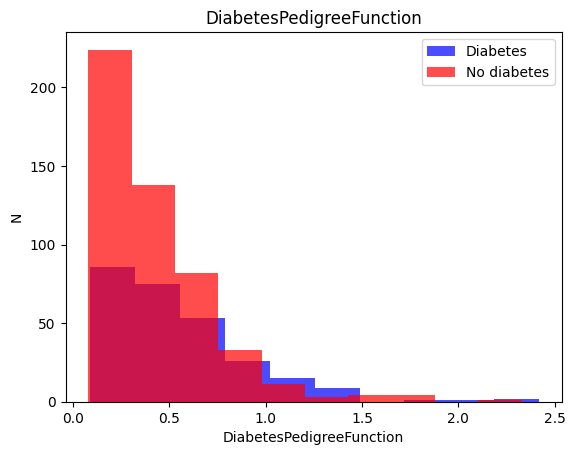

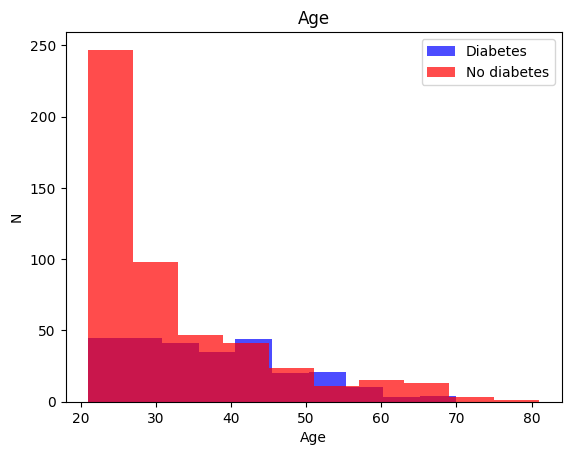

In [ ]:
for i in range(len(transformed_df.columns[:-1])):
    label = transformed_df.columns[i]
    plt.figure()  # Create a new figure for each histogram
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetes', alpha=0.7)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='No diabetes', alpha=0.7)
    plt.title(label)
    plt.ylabel("N")
    plt.xlabel(label)
    plt.legend()  # Add legend
    plt.show()  # Display the plot



In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=['accuracy'])

In [16]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.7012 - accuracy: 0.5233


[0.7011616230010986, 0.5233333110809326]

In [17]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.6750 - accuracy: 0.5833 - val_loss: 0.6417 - val_accuracy: 0.6450
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6917 - val_loss: 0.6043 - val_accuracy: 0.7350
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7183 - val_loss: 0.5748 - val_accuracy: 0.7350
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7233 - val_loss: 0.5517 - val_accuracy: 0.7550
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5609 - accuracy: 0.7267 - val_loss: 0.5339 - val_accuracy: 0.7550
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7300 - val_loss: 0.5149 - val_accuracy: 0.7550
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7350 - val_loss: 0.5014 - val_accuracy: 0.7650
Epoch 8/20
38/38 [==